##Classificação de bots e humanos utilizando aprendizado de máquina
###Rafael Augusto de Souza Silva - Sistemas de Informação - UNIFEI

## Importações de Bibliotecas  <a class="anchor" id="imports"></a>

In [ ]:
# importo a biblioteca pandas e a twitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.model_selection import FeatureImportances

## Caregamento da base de dados em formato CSV<a class="anchor" id="csv-base1"></a>

Este procedimento é realizado para todos os conjuntos de dados utilizados no estudo, neste exemplo a base se chama df_cresci_1

In [ ]:
df = pd.read_csv("df_cresci_1.csv",sep =";")
df.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,time_zone,location,default_profile,default_profile_image,geo_enabled,profile_image_url,profile_banner_url,profile_use_background_image,profile_background_image_url_https,profile_text_color,profile_image_url_https,profile_sidebar_border_color,profile_background_tile,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,contagem_favoritos,contagem_tweets,media_tweets_dia,idade_da_conta,n_respostas,n_mencoes,n_retweets,n_vezes_retuitado,intervalo_tweets,dp_intervalo,dp_dias,t_segundas,t_tercas,t_quartas,t_quintas,t_sextas,t_sabados,t_domingos,posts,num_hashtags,num_urls,tipo_usuario
0,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,Greenland,#freePalestine - rip paul,NaN,NaN,1.0,http://pbs.twimg.com/profile_images/5915979249...,https://pbs.twimg.com/profile_banners/19183965...,1.0,https://abs.twimg.com/images/themes/theme3/bg.gif,634047,https://pbs.twimg.com/profile_images/591597924...,D3D2CF,NaN,E3E2DE,http://abs.twimg.com/images/themes/theme3/bg.gif,EDECE9,088253,-7200.0,NaN,NaN,NaN,NaN,NaN,20. menna: #farida #nyc and the 80s actually y...,NaN,NaN,2010-09-17 14:02:10+00:00,2010-09-17 16:02:10,2015-05-01 13:55:16,2016-03-15 15:53:48,1277.0,3220,50.439364,4024,3220,2659.0,1092,408.0,535,3160,55.900422,456,482,480,391,490,548,373,RT @steviebuckys: do i look aesthetic yet http...,475.0,314.0,0
1,2157382005,JO,19_Joanne_87,12915,641,1066,1568,7,NaN,en,Central Time (US & Canada),NaN,NaN,NaN,NaN,http://pbs.twimg.com/profile_images/5939238358...,https://pbs.twimg.com/profile_banners/21573820...,NaN,https://abs.twimg.com/images/themes/theme1/bg.png,000000,https://pbs.twimg.com/profile_images/593923835...,000000,NaN,000000,http://abs.twimg.com/images/themes/theme1/bg.png,000000,9266CC,-18000.0,NaN,NaN,NaN,NaN,NaN,CHRISTIAN -Communication degree -graphic desig...,NaN,NaN,2013-10-28 16:08:18+00:00,2013-10-28 17:08:18,2015-05-01 13:46:12,2016-03-15 15:53:49,1726.0,3235,4.473502,2887,3235,4040.0,649,584.0,1580,5025,67.841051,447,483,472,579,491,337,426,nan | RT @BiblicalTweets_: A pocket full of cu...,760.0,373.0,0
2,1947320929,❄McKayla❄,1Dniallprincess,13676,1042,2000,19012,7,NaN,en,NaN,Alaska XD,1.0,NaN,1.0,http://pbs.twimg.com/profile_images/5837462540...,https://pbs.twimg.com/profile_banners/19473209...,1.0,https://abs.twimg.com/images/themes/theme1/bg.png,333333,https://pbs.twimg.com/profile_images/583746254...,C0DEED,NaN,DDEEF6,http://abs.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,NaN,NaN,NaN,"Live, Young, Wild and Free #crazymofo",NaN,NaN,2013-10-08 15:59:30+00:00,2013-10-08 17:59:30,2015-05-01 13:35:33,2016-03-15 15:53:49,202.0,3175,4.704506,2907,3175,3286.0,2800,141.0,3433,17622,139.976383,406,278,353,555,739,432,412,RT @TaylorBauerkemp: The worst feeling http://...,1230.0,276.0,0
3,1733095801,Nicole Romany,1Nicoleromany,4854,337,256,1407,4,NaN,en,NaN,NaN,1.0,NaN,1.0,http://pbs.twimg.com/profile_images/5831173170...,https://pbs.twimg.com/profile_banners/17330958...,1.0,https://abs.twimg.com/images/themes/theme1/bg.png,333333,https://pbs.twimg.com/profile_images/583117317...,C0DEED,NaN,DDEEF6,http://abs.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-09-05 20:52:02+00:00,2013-09-05 22:52:02,2015-05-01 13:16:34,2016-03-15 15:53:50,422.0,3217,1.651020,2940,3217,1725.0,486,577.0,10594,37956,194.161094,561,607,552,614,558,81,244,@ClydeenMcDonald thanks hun. I actually just a...,2113.0,567.0,0
4,21959183,Randee Deason,2hip4tv,10354,1948,2096,3,88,http://t.co/mtQ3mK85p6,en,Pacific Time (US & Canada),"Bay Area, Ca.",NaN,NaN,NaN,http://pbs.twimg.com/profile_images/5929369127...,https://pbs.twimg.com/profile_banners/21959183...,

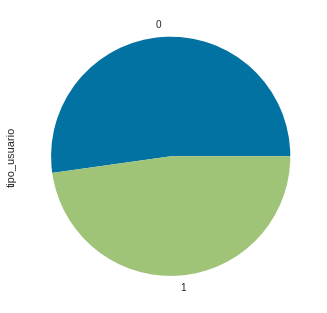

In [ ]:
df.tipo_usuario.value_counts().plot(kind='pie') #0 é humano e 1 é bot

#Seleção dos atributos

Seleção das colunas que possuem apenas valor numérico

In [ ]:
colunas = []
for x in df.columns:
    if (df[x].dtype == np.float64 or df[x].dtype == np.float32 or df[x].dtype == np.int64 or df[x].dtype == np.int32):
        colunas.append(x)

Exibição das colunas selecionadas

In [ ]:
colunas

['id',
 'statuses_count',
 'followers_count',
 'friends_count',
 'favourites_count',
 'listed_count',
 'default_profile',
 'default_profile_image',
 'geo_enabled',
 'profile_use_background_image',
 'profile_background_tile',
 'utc_offset',
 'is_translator',
 'follow_request_sent',
 'protected',
 'verified',
 'notifications',
 'contributors_enabled',
 'following',
 'contagem_favoritos',
 'contagem_tweets',
 'media_tweets_dia',
 'idade_da_conta',
 'n_respostas',
 'n_mencoes',
 'n_retweets',
 'n_vezes_retuitado',
 'intervalo_tweets',
 'dp_intervalo',
 'dp_dias',
 't_segundas',
 't_tercas',
 't_quartas',
 't_quintas',
 't_sextas',
 't_sabados',
 't_domingos',
 'num_hashtags',
 'num_urls',
 'tipo_usuario']

Verificação das colunas que tem dado com valor nulo e separação apenas as colunas que não possuem dados nulos

In [ ]:
atributos = [x for x in colunas if df[x].isnull().sum() == 0]
df[colunas].isnull().sum() == 0

id                               True
statuses_count                   True
followers_count                  True
friends_count                    True
favourites_count                 True
listed_count                     True
default_profile                 False
default_profile_image           False
geo_enabled                     False
profile_use_background_image    False
profile_background_tile         False
utc_offset                      False
is_translator                   False
follow_request_sent             False
protected                       False
verified                        False
notifications                   False
contributors_enabled            False
following                       False
contagem_favoritos               True
contagem_tweets                  True
media_tweets_dia                 True
idade_da_conta                   True
n_respostas                      True
n_mencoes                        True
n_retweets                       True
n_vezes_retu

Visualização dos atributos selecionados

In [ ]:
atributos

['id',
 'statuses_count',
 'followers_count',
 'friends_count',
 'favourites_count',
 'listed_count',
 'contagem_favoritos',
 'contagem_tweets',
 'media_tweets_dia',
 'idade_da_conta',
 'n_respostas',
 'n_mencoes',
 'n_retweets',
 'n_vezes_retuitado',
 'intervalo_tweets',
 'dp_intervalo',
 'dp_dias',
 't_segundas',
 't_tercas',
 't_quartas',
 't_quintas',
 't_sextas',
 't_sabados',
 't_domingos',
 'num_hashtags',
 'num_urls',
 'tipo_usuario']

Verificação da quantidade de bots e humanos na base, 0 é humano e 1 é bot

In [ ]:
df.groupby(['tipo_usuario']).size()

tipo_usuario
0    1083
1     991
dtype: int64

Separação dos atributos que serão usados para a classificação, a celula abaixo deve ser executada caso deseje fazer a classificação com todos os atributos

In [ ]:
X = df[atributos[1:26]]
y = df[atributos[26]]

A celula abaixo deve ser executada caso deseje fazer a classificação apenas com os atributos mais importantes identificado pelo Floresta Aleatória

In [ ]:
X = df[['statuses_count', 'favourites_count', 'media_tweets_dia', 'n_mencoes', 'n_retweets', 'num_urls']]
y = df[['tipo_usuario']]

#Declaração das classificadores e separação do conjunto em treino e teste

In [ ]:
pipe_mlp = make_pipeline(StandardScaler(),MLPClassifier(random_state=42))
forest = RandomForestClassifier(random_state=42, n_jobs = -1)
rt = DecisionTreeClassifier(random_state=42)
nb = MultinomialNB()

Separação do conjto em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classificação com o Naïve Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
predicoes_1 = nb.predict(X_test)
accuracy_score(y_test, predicoes_1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7807228915662651

Validações cruzadas de 3 5 e 10 pastas

In [ ]:
cross_val_score(nb, X_train, y_train, cv=3).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8282097649186256

In [ ]:
cross_val_score(nb, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.8234084373748771

In [ ]:
cross_val_score(nb, X_train, y_train, cv=10).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.8149288061336255

Matriz de confusão ca classificação

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.7807228915662651

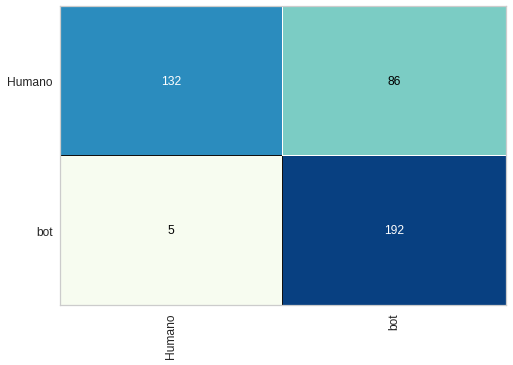

In [ ]:
cm = ConfusionMatrix(nb, classes=["Humano","bot"], cmap='GnBu')
cm.score(X_test, y_test)

Métricas de avaliação, F1 precisão e revocação respectivamente

In [ ]:
metrics.f1_score(y_test, predicoes_1)

0.808421052631579

In [ ]:
precision_score(y_test, predicoes_1)

0.6906474820143885

In [ ]:
recall_score(y_test, predicoes_1)

0.9746192893401016

#Classificação com a Arvore de Decisão

In [ ]:
rt.fit(X_train,y_train)
predicoes_2 = rt.predict(X_test)
accuracy_score(y_test, predicoes_2)

0.9566265060240964

Validações cruzadas de 3 5 e 10 pastas

In [ ]:
cross_val_score(rt, X_train, y_train, cv=3).mean()

0.9668474984930682

In [ ]:
cross_val_score(rt, X_train, y_train, cv=5).mean()

0.9662395806792123

In [ ]:
cross_val_score(rt, X_train, y_train, cv=10).mean()

0.9698649142022637

Matriz de confusão ca classificação

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9566265060240964

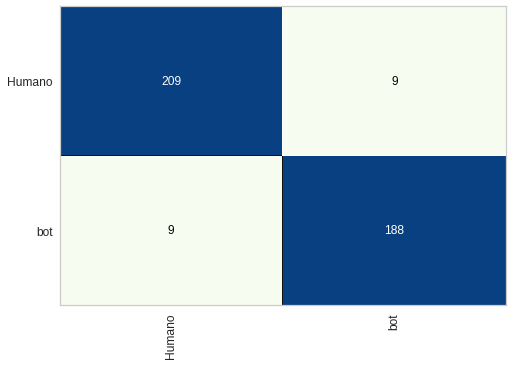

In [ ]:
cm = ConfusionMatrix(rt, classes=["Humano","bot"], cmap='GnBu')
cm.score(X_test, y_test)

Métricas de avaliação, F1 precisão e revocação respectivamente

In [ ]:
metrics.f1_score(y_test, predicoes_2)

0.9543147208121827

In [ ]:
precision_score(y_test, predicoes_2)

0.9543147208121827

In [ ]:
recall_score(y_test, predicoes_2)

0.9543147208121827

#Classificação com a Floresta Aleatória

In [ ]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest.fit(X_train,y_train)
predicoes_3 = forest.predict(X_test)
accuracy_score(y_test, predicoes_3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9686746987951808

Validações cruzadas de 3 5 e 10 pastas

In [ ]:
cross_val_score(forest, X_train, y_train, cv=3).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.9776974080771549

In [ ]:
cross_val_score(forest, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

0.9770884140792779

In [ ]:
cross_val_score(forest, X_train, y_train, cv=10).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

0.9752829499817451

Matriz de confusão ca classificação

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9686746987951808

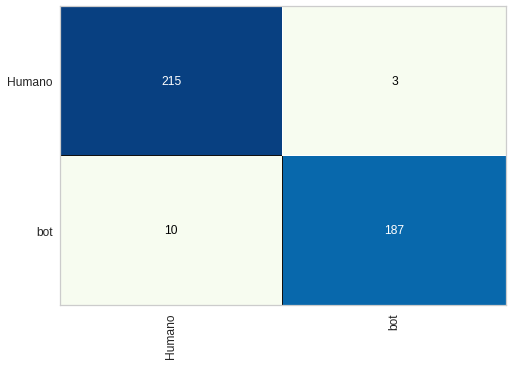

In [ ]:
cm = ConfusionMatrix(forest, classes=["Humano","bot"], cmap='GnBu')
cm.score(X_test, y_test)

Métricas de avaliação, F1 precisão e revocação respectivamente

In [ ]:
metrics.f1_score(y_test, predicoes_3)

0.9664082687338501

In [ ]:
precision_score(y_test, predicoes_3)

0.9842105263157894

In [ ]:
recall_score(y_test, predicoes_3)

0.949238578680203

#Classificação com o MLP

In [ ]:
pipe_mlp.fit(X_train,y_train)
predicoes_4 = pipe_mlp.predict(X_test)
accuracy_score(y_test, predicoes_4)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.9421686746987952

Validações cruzadas de 3 5 e 10 pastas

In [ ]:
cross_val_score(pipe_mlp, X_train, y_train, cv=3).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

0.9397227245328512

In [ ]:
cross_val_score(pipe_mlp, X_train, y_train, cv=5).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

0.9445364539729917

In [ ]:
cross_val_score(pipe_mlp, X_train, y_train, cv=10).mean()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conve

0.9451332603139833

Matriz de confusão ca classificação

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9686746987951808

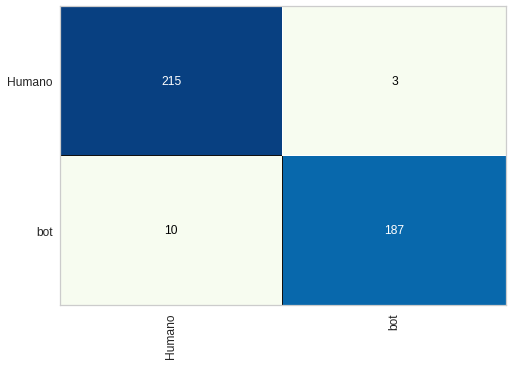

In [ ]:
cm = ConfusionMatrix(forest, classes=["Humano","bot"], cmap='GnBu')
cm.score(X_test, y_test)

Métricas de avaliação, F1 precisão e revocação respectivamente

In [ ]:
metrics.f1_score(y_test, predicoes_4)

0.9396984924623115

In [ ]:
precision_score(y_test, predicoes_4)

0.9303482587064676

In [ ]:
recall_score(y_test, predicoes_4)

0.949238578680203

#Identificação dos melhores atributos para o Floresta Aleatória

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


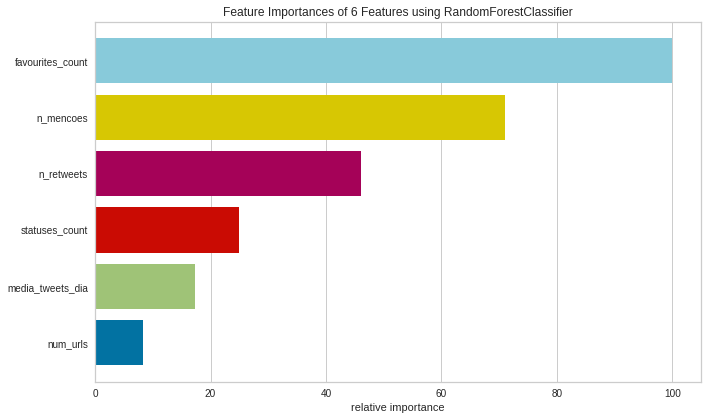

In [ ]:
fig,ax = plt.subplots(figsize = (10,6))
fi_vis = FeatureImportances(forest)
fi_vis.fit(X,y)
fi_vis.poof()

Exprtação da imagem com os melhores atributos

In [ ]:
fi_vis.show(outpath="melhores_atributos.png")


<Figure size 576x396 with 0 Axes>